In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling (1).csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The data looks clean without any missing values. 
Minimum values in the column "Experience" is -3 which doesn't makes sense and needs to be handled. 


In [6]:
df[df['Experience'] < 0]['Experience'].value_counts() #count the number of negative values in the dataset

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [7]:
df[df['Experience'] < 0]['Age'].value_counts() # age frequency of negative experience customers

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

In [8]:
# Replacing the negative experience with the mean of experience of the same age. 
ages = df[df['Experience'] < 0]['Age'].unique().tolist()
indexes = df[df['Experience'] < 0].index.tolist()

for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.135743,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.413140,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Exploratory Data Analysis

### 'Education' and 'Income' on Personal Loans 

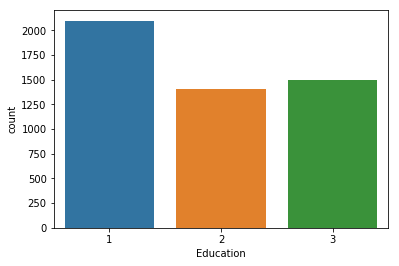

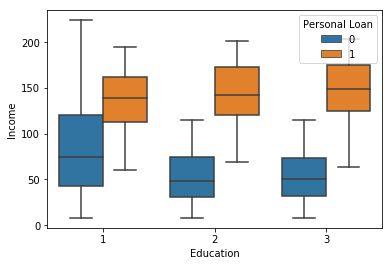

In [9]:
sns.countplot(x='Education',data=df)
plt.show()
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df);

It is evident that customer with higher income level have personal loan. Also, income range of customers falling under education catergory 1 (Undergrads) is higher compared to 2 (Graduates) and 3 (Advanced/Professionals). However, customer who take loan have almost same income range and median. 


### 'Mortgages' and 'Education' on Personal Loan 

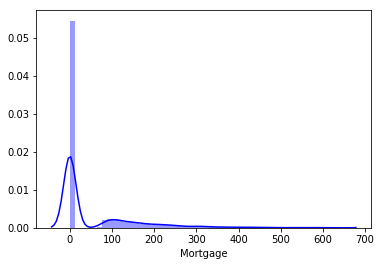

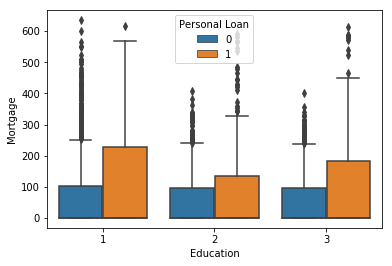

In [10]:
sns.distplot(df['Mortgage'],color = 'b')
plt.show()
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df);

- Customers with personal loans have higher mortgages despite the category of education. 
- Morgages are positively skewed.

 ### Certificate of deposit: 'CD Account' 

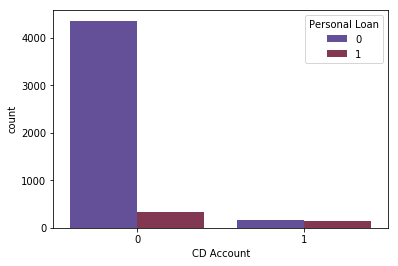

In [11]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan',palette='twilight');

Majority of customers who do not have loans does not have CD accounts. 

###  Family size of the customer

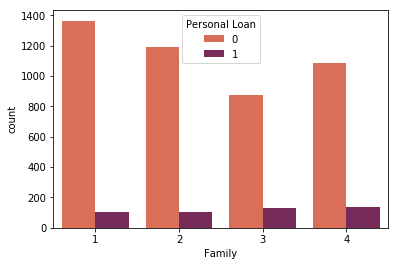

In [12]:
sns.countplot(x='Family',data=df,hue='Personal Loan',palette='rocket_r')

Family size does not play a very significant role in personal loan. However, family size of 3 and above are more likely to take loans can be considered. 

### Avg. spending on credit cards per month: 'CCAvg'

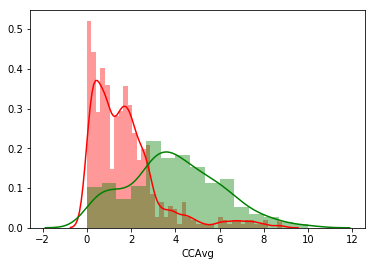

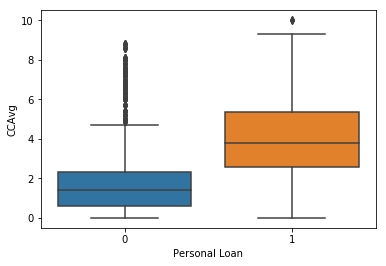

In [13]:
sns.distplot(df[df['Personal Loan'] == 0]['CCAvg'], color = 'r');
sns.distplot(df[df['Personal Loan'] == 1]['CCAvg'], color = 'g');
plt.show()
sns.boxplot(x='Personal Loan',y='CCAvg',data=df);

- The credit card expenses(spending) of customers with loans is significantly higher than the ones without loan. 

### Internet Banking Facility: 'Online'

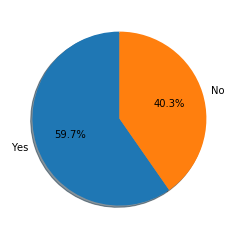

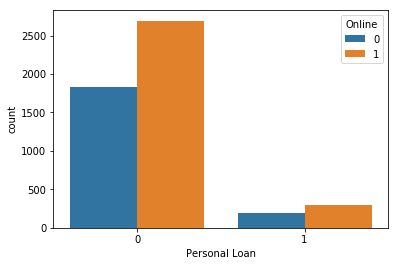

In [14]:
labels_4g = ['Yes','No']
values_4g = df['Online'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, shadow=True, startangle=90, autopct='%1.1f%%');
plt.show()
sns.countplot(df['Personal Loan'], hue=df['Online']);

About 59.7% of the customers use internet banking facility. 

### Distribution of features:

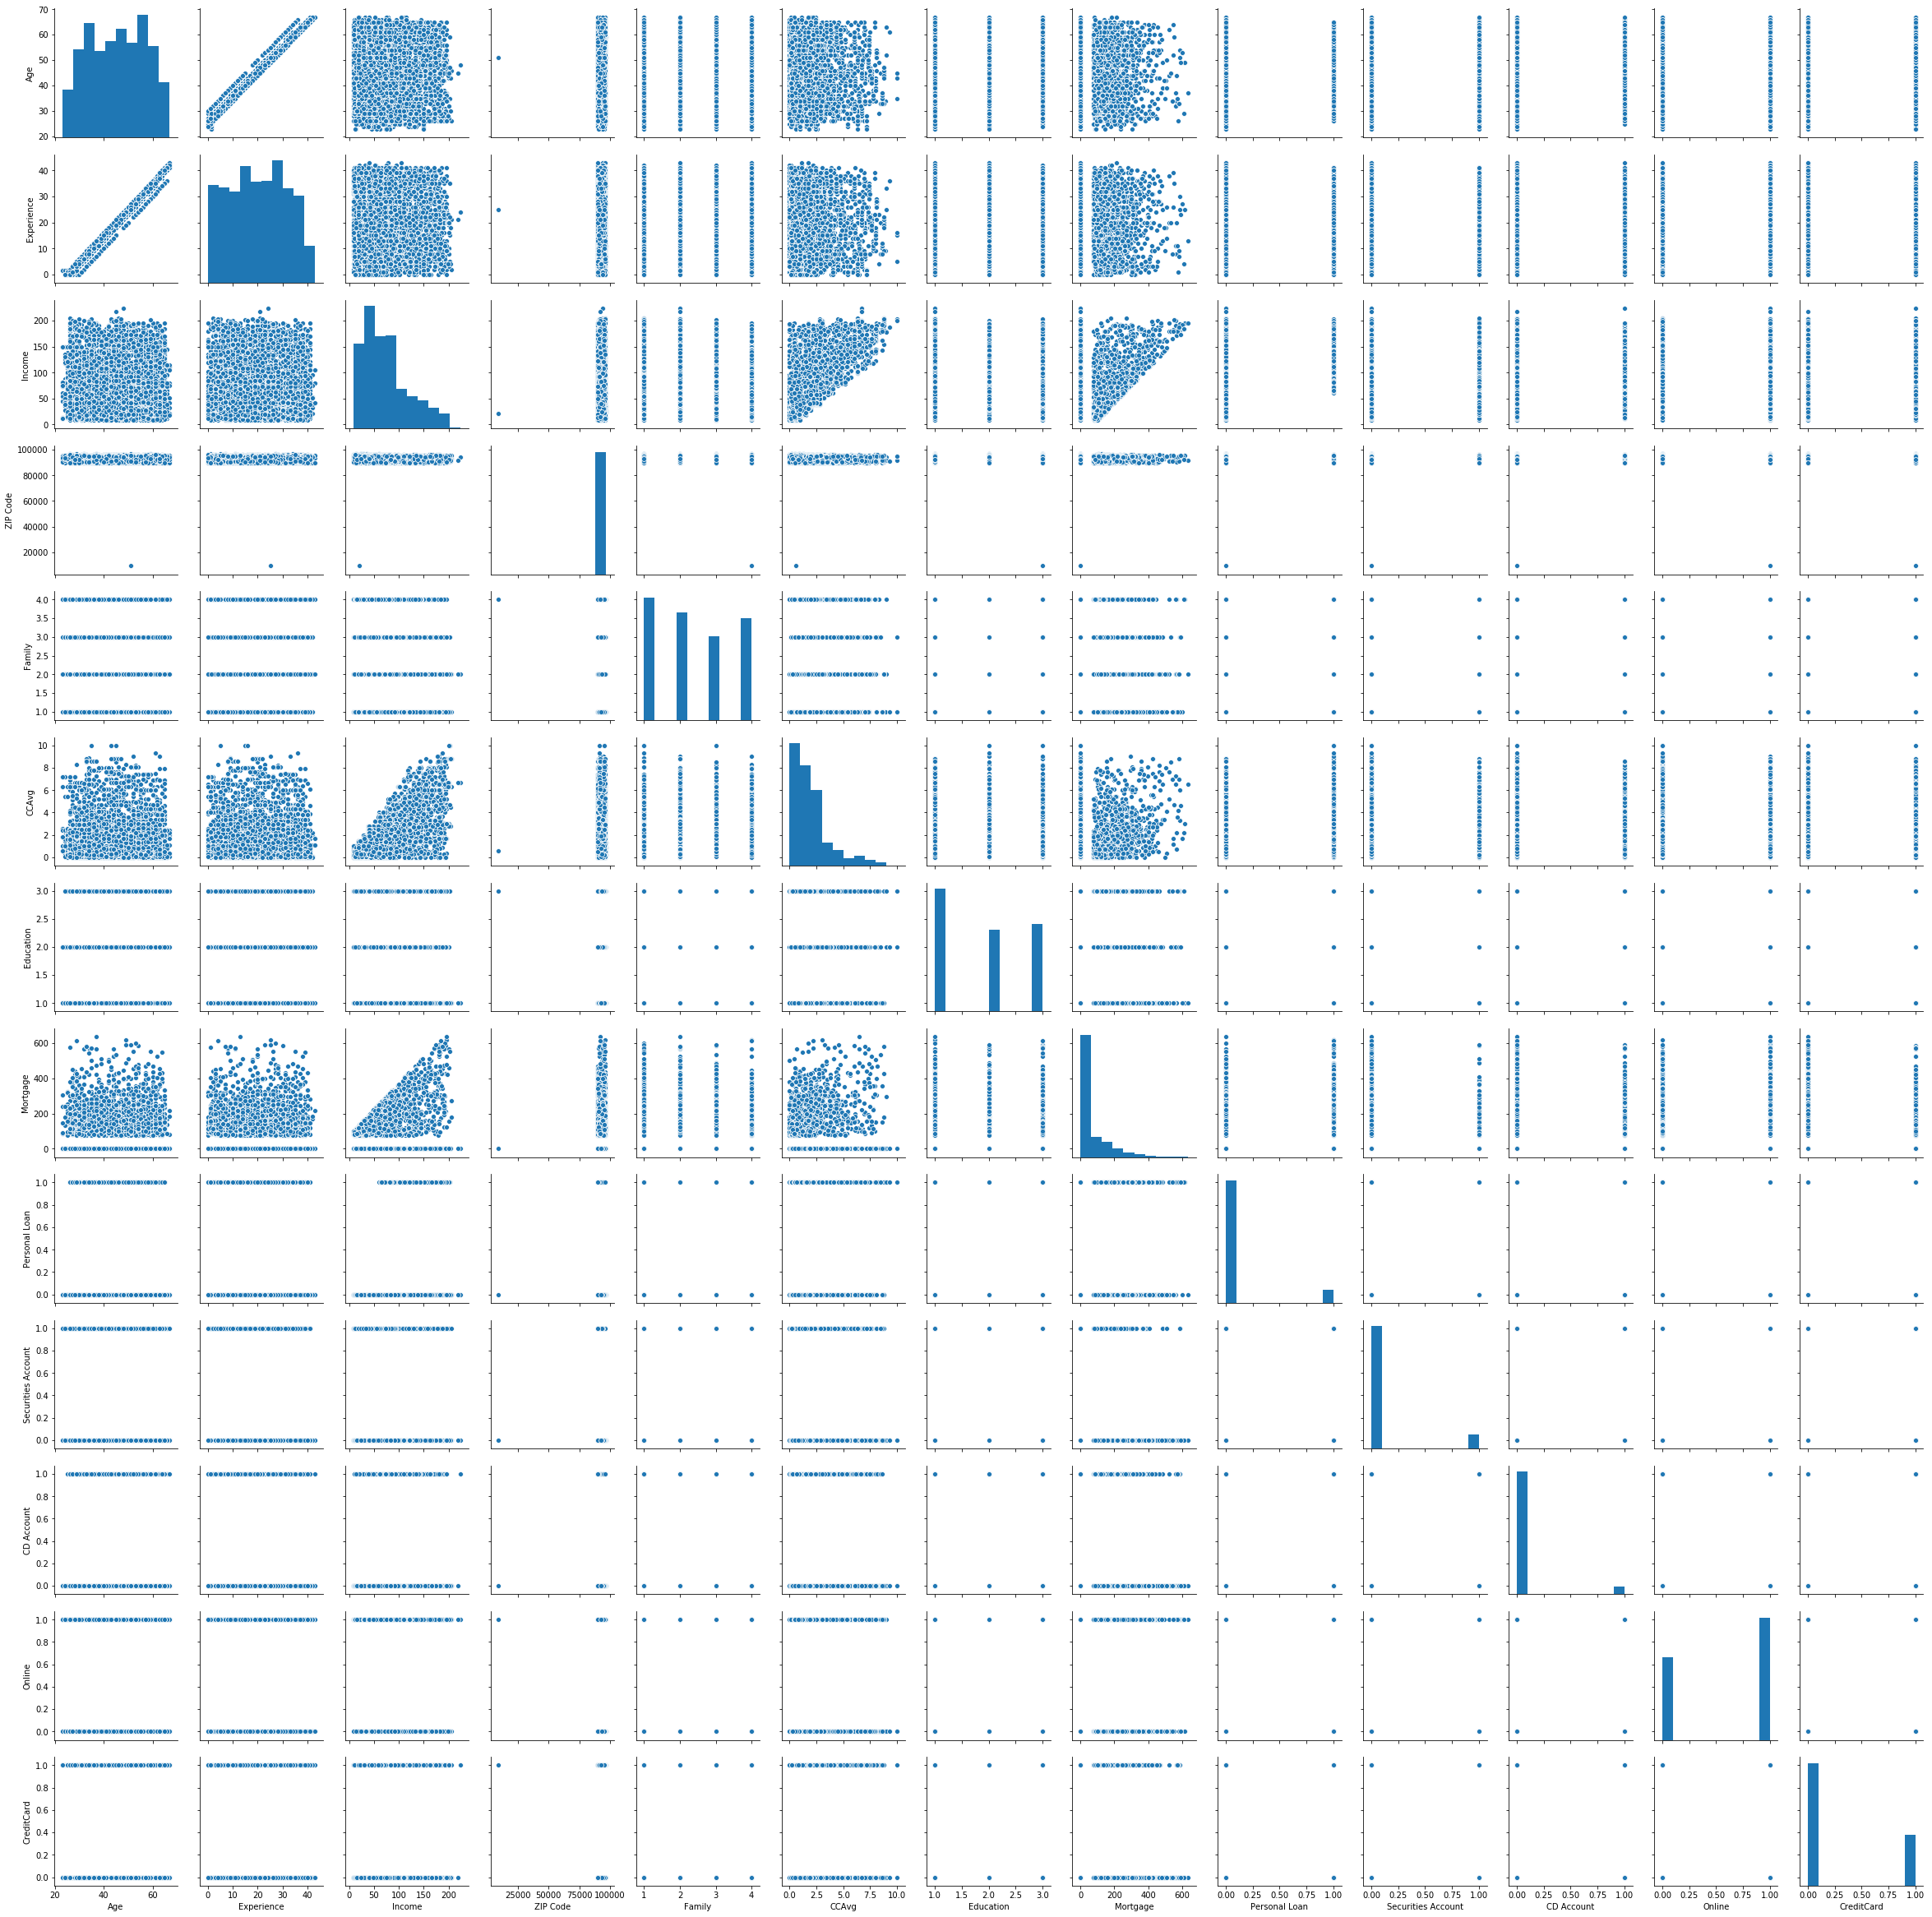

In [15]:
sns.pairplot(df.iloc[:,1:])

- Age is normally distributed. Most of the customers fall between 30 to 60 years. 
- Experience also follows a gaussian curve and has a high correlation with Age. 
- Income is positively skewed with majority falling between 45k to 55k. 
- CC average is also positively skewed with 75% spending less than 2.5K and maximum 10k. 
- Morgages also has positive skewness with mean around 56.4k. 

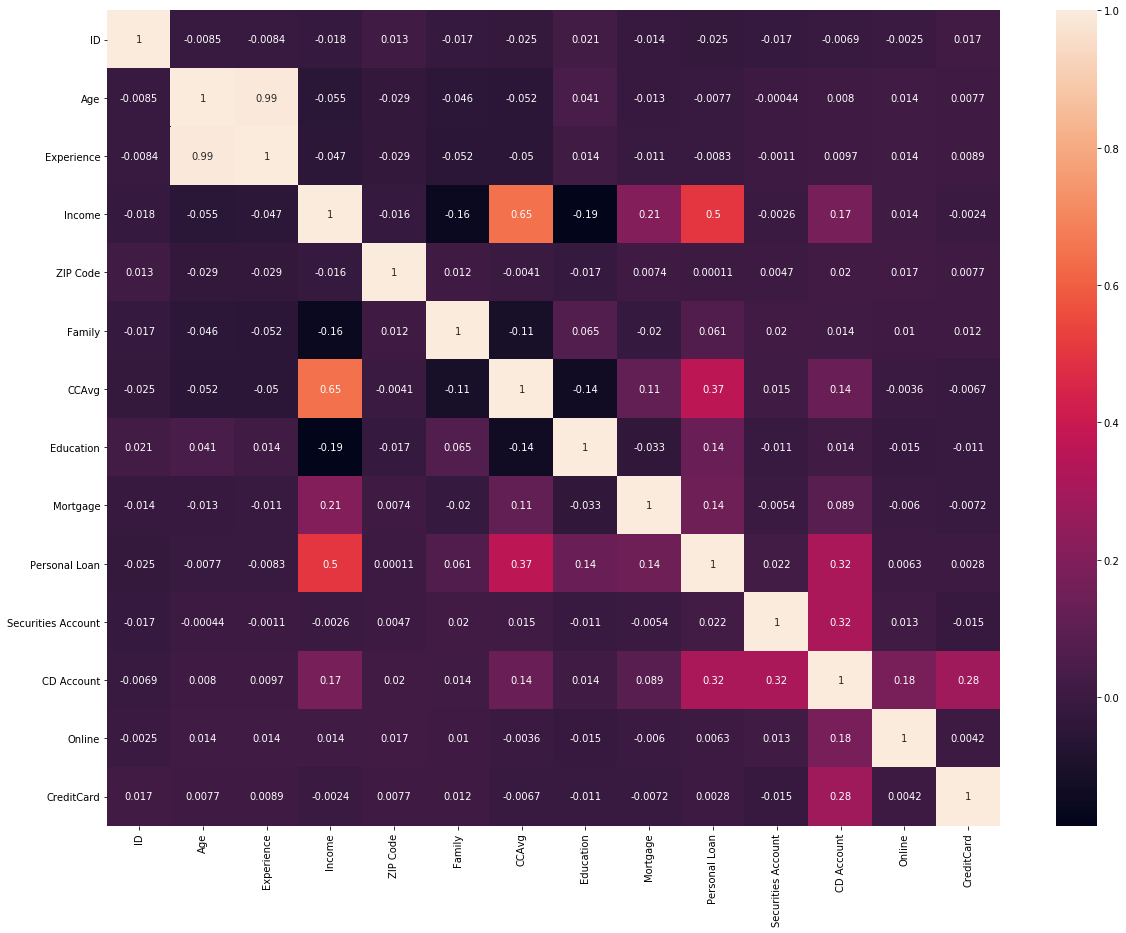

In [16]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
g = sns.heatmap(df[top_corr_features].corr(),annot = True)

- There is a large correlation between Income and CC Avg (Avg. spending on credit cards per month)
- Age and Experience also has an almost high(0.5) correlation. 
- CC Avg(Avg. spending on credit cards per month) is moderately correlated with the target feature Personal Loan.  
- There is almost zero correlation between Personal Loan and Zip Code which makes sense.  

### Data Preprocessing

In [17]:
df = pd.get_dummies(df, columns = ['Education','Mortgage','Securities Account','CD Account','Online','CreditCard']) 
# One-hot encoding the categorical variables

In [18]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Personal Loan,Education_1,Education_2,...,Mortgage_617,Mortgage_635,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1,25,1.0,49,91107,4,1.6,0,1,0,...,0,0,0,1,1,0,1,0,1,0
1,2,45,19.0,34,90089,3,1.5,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,3,39,15.0,11,94720,1,1.0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
3,4,35,9.0,100,94112,1,2.7,0,0,1,...,0,0,1,0,1,0,1,0,1,0
4,5,35,8.0,45,91330,4,1.0,0,0,1,...,0,0,1,0,1,0,1,0,0,1


In [19]:
standardScaler = StandardScaler() #Scaling the continous variables. 
columns_to_scale = ['Income','Experience']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Personal Loan,Education_1,Education_2,...,Mortgage_617,Mortgage_635,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,1,25,-1.676809,-0.538229,91107,4,1.6,0,1,0,...,0,0,0,1,1,0,1,0,1,0
1,2,45,-0.099522,-0.864109,90089,3,1.5,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,3,39,-0.450030,-1.363793,94720,1,1.0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
3,4,35,-0.975793,0.569765,94112,1,2.7,0,0,1,...,0,0,1,0,1,0,1,0,1,0
4,5,35,-1.063420,-0.625130,91330,4,1.0,0,0,1,...,0,0,1,0,1,0,1,0,0,1


### Train-test Split 

In [20]:
X = df.drop(["ZIP Code", "ID", "Personal Loan"] , axis = 1) #Zip code and ID columns are removed as they don't determine the target variable
y = df[['Personal Loan']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.7, random_state=101)

### Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

logmodel.fit(X_train,y_train)
log_predict = logmodel.predict(X_test)
print("Logistic Regression Model Score for Train Data=",logmodel.score(X_train, y_train)) #Train Classification accuracy
print("Logistic Regression Model Score for Test Data=",logmodel.score(X_test, y_test)) #Test Classification accuracy

Logistic Regression Model Score for Train Data= 0.9753333333333334
Logistic Regression Model Score for Test Data= 0.9545714285714286


In [22]:
from sklearn.model_selection import GridSearchCV #GridSearch CV to compute the optimum values of hyperparameters.
param_grid1 = [
    {'C' : np.logspace(-4,4,20),
     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'max_iter': [100,1000,2500,5000]
    }
]

In [23]:
rf_Grid1 = GridSearchCV(estimator = logmodel, param_grid = param_grid1, cv = 3, verbose = True, n_jobs = -1) 

In [24]:
rf_Grid1.fit(X_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 20.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=29.763514416313132,
                                          class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter':

In [25]:
rf_Grid1.best_estimator_ #best hyperparameters

LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(classification_report(log_predict, y_test)) #Classifiction report 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3252
           1       0.64      0.83      0.72       248

    accuracy                           0.95      3500
   macro avg       0.81      0.90      0.85      3500
weighted avg       0.96      0.95      0.96      3500



Confusion Matrix:
 [[3134  118]
 [  41  207]]


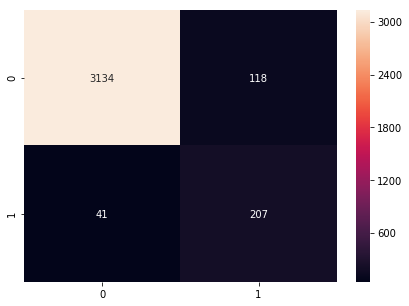

In [27]:
print("Confusion Matrix:\n",metrics.confusion_matrix(log_predict, y_test))
conf_mat = confusion_matrix(log_predict, y_test)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (7,5));
sns.heatmap(df_conf_mat, annot=True, fmt='g');

### Naive Bayes

In [28]:
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
print("Naive Bayes Model Score for Train Data=", model_naive.score(X_train, y_train)) #Train Classification accuracy
print("Naive Bayes Model Score for Test Data=",model_naive.score(X_test, y_test)) #Test Classification accuracy

naive_predicted = model_naive.predict(X_test)

Naive Bayes Model Score for Train Data= 0.3453333333333333
Naive Bayes Model Score for Test Data= 0.26685714285714285


In [29]:
print(classification_report(naive_predicted, y_test))

              precision    recall  f1-score   support

           0       0.21      0.93      0.34       715
           1       0.84      0.10      0.17      2785

    accuracy                           0.27      3500
   macro avg       0.52      0.51      0.26      3500
weighted avg       0.71      0.27      0.21      3500



Confusion Matrix:
 [[ 662   53]
 [2513  272]]


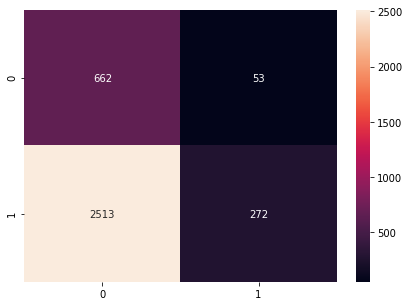

In [30]:
print("Confusion Matrix:\n",metrics.confusion_matrix(naive_predicted, y_test))
conf_mat = confusion_matrix(naive_predicted, y_test)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (7,5));
sns.heatmap(df_conf_mat, annot=True, fmt='g');

### K-Nearest Neighbours 

In [31]:
KNNH=KNeighborsClassifier(n_neighbors = 3)
KNNH.fit(X_train, y_train)

print("Score for training data is =", KNNH.score(X_train, y_train)) #Train Classification accuracy
print("Score for test data is =", KNNH.score(X_test, y_test))  #Test Classification accuracy

KNN_predicted = KNNH.predict(X_test)

Score for training data is = 0.956
Score for test data is = 0.9354285714285714


In [32]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [33]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


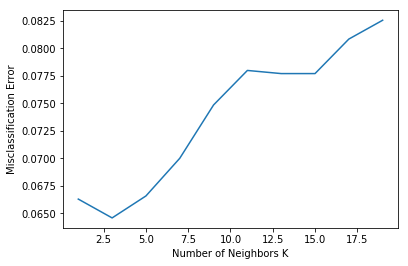

In [34]:
import matplotlib.pyplot as plt
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [35]:
print(classification_report(y_test, KNN_predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3175
           1       0.80      0.41      0.54       325

    accuracy                           0.94      3500
   macro avg       0.87      0.70      0.75      3500
weighted avg       0.93      0.94      0.93      3500



Confusion Matrix:
 [[3142   33]
 [ 193  132]]


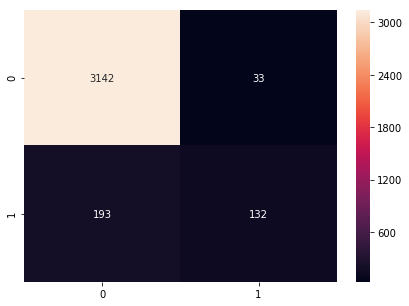

In [36]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, KNN_predicted))
conf_mat = confusion_matrix(y_test, KNN_predicted)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (7,5));
sns.heatmap(df_conf_mat, annot=True, fmt='g');

### Support Vector Machine

0.9646666666666667
0.9537142857142857
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3289
           1       0.58      0.89      0.70       211

    accuracy                           0.95      3500
   macro avg       0.78      0.92      0.84      3500
weighted avg       0.97      0.95      0.96      3500

Confusion Matrix:
 [[3151  138]
 [  24  187]]


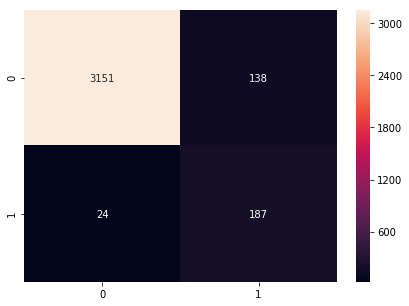

In [69]:
from sklearn.svm import SVC

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction_svc = svc_model .predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

print(classification_report(prediction_svc,y_test))

print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_svc,y_test))
conf_mat = confusion_matrix(prediction_svc,y_test)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (7,5));
sns.heatmap(df_conf_mat, annot=True, fmt='g');

### Model Evaluation: 

- We have got 95%, 27%, 94%,95% of accuracy from logistic regression, Naive Bayes, KNN and SVM. 
- The number of buyer’s percentage to the non-buyer percentage is very less. Hence, accuracy only cannot play a big role in determining which is our best model.
- Among logistic regression and SVM both having 95% accuracy, _SVM_ is preferred as recall is more important than precision in this case. 
- Here, recall is more important than precision as the cost of acting is low, but the opportunity cost of passing up on a customer is high. 
- The cost of missing out on customer isn't high, but the cost of targeting a customer who doesn't respond is even lower in case of SVM (when recall is considered).
- SVM has a accuracy of 95% and recall of 92% is the best fit model. 
- SVM can be deployed to predict the likelihood of a liability customer buying personal loans.

### Reasons for poor prediction by Naive Bayes: 
- Bayes theorem uses the conditional probability of an event. Events should be mutually exclusive which is not the case here. 
- Bayes Theorem assumes predictors or input features are independent of each other.

